# Capstone Project EDA
# The 2016-2017 NBA Season
## Michael Phillips

What's another disappointing season to an NBA squad? The staff and players still get paid. The draft will roll around soon and before you know it a whole new season will start, hopefully with a groundswell of support from the fans.  

From the outside looking in, this oversimplification is indeed how it appears. Life goes on, win or lose, for the fans and the players. After all, only so much blame for a disastrous season can go to the players themselves - they aren't the ones responsible for building the team and designing strategies. The team executives are the ones responsible, and to them winning and losing is of vital importance. Jobs are on the line every day for the coaches, scouts, video analysts, and executives who shape the makeup of their team. 

Identifying exactly what sets the winning teams apart from the losing teams and providing concrete examples of what needs to change could impact an organization at every level. Based on the results of an analysis you could tell an individual player to shoot more corner 3's, provide the coach with information that could help design higher-percentage plays, and assist the executives with finding players that fit the new plan.

This project will explore issues like these, providing answers that would hopefully prove useful to an NBA team, or at least provide avenues that would be worth further investigation. For example, if a metric identifies a player on another team as above average in a certain category than more detailed analysis might be warranted to see if that player is worth pursuing in a trade or through free agency.

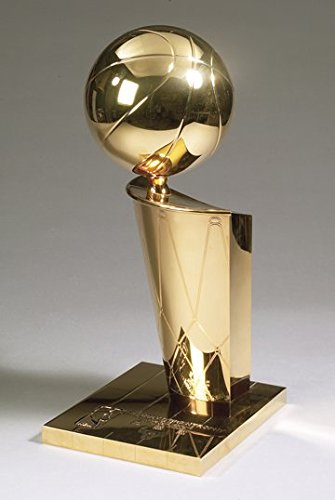

In [1]:
from IPython.display import Image

Image("trophy.jpg")

## My Perspective on the NBA and Basketball

I love basketball, have since I was a little kid. I grew up playing basketball and also going to Sacramento Kings games with my family. The feeling when a whole city rallies around their team is a special one that might be unique to professional sports. 

I am by no means an expert on the x's-and-o's of drawing up plays but I have formulated some opinions on how I think the game should be played. Basketball is first and foremost a team game. Crisp, fast passes on offense create open looks that the more isolation-focused teams struggle to emulate. On defense, the squad must communicate and be aware of what is happening around them. They have to help each other cover weaknesses and prevent those passes from opening the court up too much. 

The Golden State Warriors are a prime example. Their 2016-2017 team was one of the best NBA squads in history by most statistical measures and their 16-1 record in the playoffs was the single best playoff performance ever. They pass the ball on offense and routinely get open looks. None of their players are particularly good individual defenders, but together they can get stops when they need to. I will draw attention to the Warriors in this exploration when their stats are noteworthy. I think most if not all teams could implement some of what the Warriors do, to improve their own play.

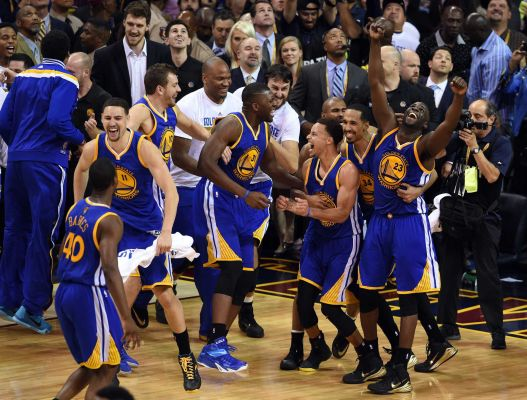

In [2]:
Image("image.jpg")

## Total Wins by Team

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

The first dataset I'll use contains team boxscores from every game. Lets quickly take a look at the variables it holds. 

In [12]:
tbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/team_box_score_cleaned.csv')

In [13]:
pd.set_option('display.max_columns', 60)
tbsdf.head()

,DATE,TEAMS,VENUE,1Q,2Q,3Q,4Q,OT1,OT2,OT3,OT4,F,MIN,FG,FGA,3P,3PA,FT,FTA,OR,DR,TOT,A,PF,ST,TO,TO TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,STARTING LINEUPS1,STARTING LINEUPS2,STARTING LINEUPS3,STARTING LINEUPS4,STARTING LINEUPS5
0,2016-10-25,New York,Road,18,27,19,24,NaN,NaN,NaN,NaN,88,240,32,87,9,27,15,20,13,29,42,17,22,6,18,18,6,88,100.4,100.4,87.7,116.6,3+,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose
1,2016-10-25,Cleveland,Home,28,20,34,35,NaN,NaN,NaN,NaN,117,240,45,94,13,35,14,19,11,40,51,31,22,12,14,15,5,117,100.4,100.4,116.6,87.7,3+,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving
2,2016-10-25,Utah,Road,26,20,37,21,NaN,NaN,NaN,NaN,104,240,40,82,8,24,16,16,6,25,31,19,19,9,11,14,5,104,92.5,92.5,112.4,122.1,3+,Joe Johnson,Boris Diaw,Rudy Gobert,Rodney Hood,George Hill
3,2016-10-25,Portland,Home,26,28,23,36,NaN,NaN,NaN,NaN,113,240,39,75,13,19,22,22,5,29,34,22,18,5,12,13,3,113,92.5,92.5,122.1,112.4,3+,Maurice Harkless,Al-Farouq Aminu,Mason Plumlee,CJ McCollum,Damian Lillard
4,2016-10-25,San Antonio,Road,31,33,33,32,NaN,NaN,NaN,NaN,129,240,47,98,12,24,23,26,21,34,55,25,19,13,13,14,3,129,98.8,98.8,130.6,101.2,3+,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker


Two rows per game, one for each team. Noticeably absent is a column denoting which team actually won the game.

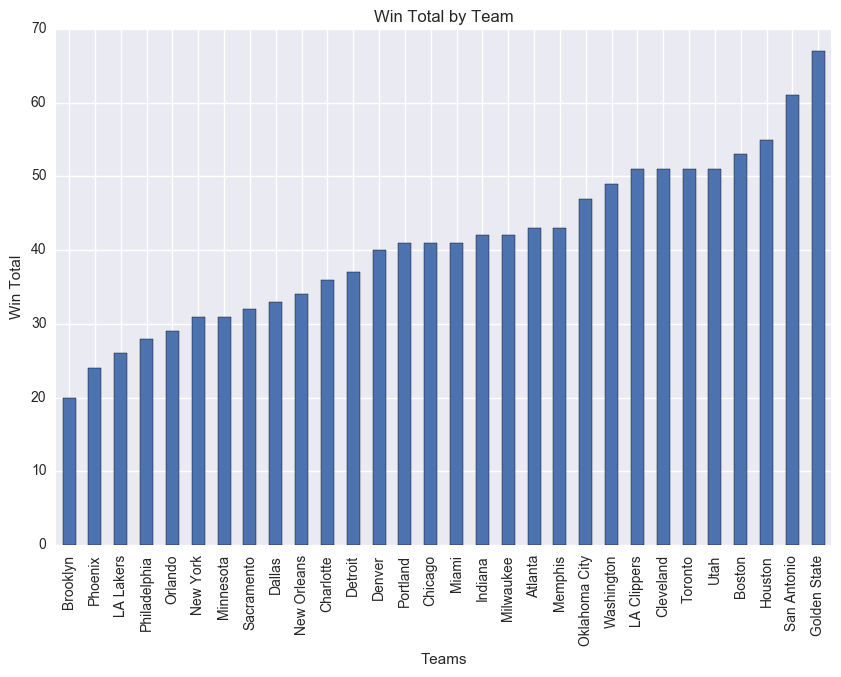

In [6]:
# add opponent scores to each row
tbsdf.loc[tbsdf['VENUE']=='Road', 'oppscore'] = tbsdf['F'].shift(-1)
tbsdf.loc[tbsdf['VENUE']=='Home', 'oppscore'] = tbsdf['F'].shift(1)

# function to do simple comparison of scores
def win_or_loss(row):
    if row['F'] > row['oppscore']:
        return 1
    else:
        return 0

# create win or loss column 
tbsdf['win_or_loss'] = tbsdf.apply(win_or_loss, axis=1)
wins_df = tbsdf['win_or_loss'].groupby(tbsdf['TEAMS']).sum().sort_values()

# create bar graph to show win totals by team
ax = wins_df.plot(kind='bar',
                 title='Win Total by Team',
                 figsize=(10,6.66),
                 legend=False)
ax.set_ylabel('Win Total')
ax.set_xlabel('Teams')

## Opponent's Field Goal Percentage by Team

One limitation of box score stats, especially for basketball, is that it is quite difficult to measure how well a team plays defense. For this exploration I will mostly be concerned with offensive performance - which mirrors the current NBA, where teams generally only need to play enough defense to outscore their opponent. Actually playing solid defense for a full 48 minutes is a nice goal, but few NBA teams actually make the effort to do that. 

That said, there is one defensive stat present in the data that I am curious about: opponent field goal percentage. 

In [7]:
# add opponent field goal percentage to each row
tbsdf.loc[tbsdf['VENUE']=='Road', 'opp_fgpct'] = tbsdf['FG'].shift(-1) / tbsdf['FGA'].shift(-1)
tbsdf.loc[tbsdf['VENUE']=='Home', 'opp_fgpct'] = tbsdf['FG'].shift(1) / tbsdf['FGA'].shift(1)

In [8]:
# create new dataframe to hold win totals and opponent fg percentage by team
fg_pct_df = tbsdf[['TEAMS', 'opp_fgpct', 'win_or_loss']]
fg_pct_df = fg_pct_df.groupby('TEAMS').agg({'opp_fgpct':'mean', 'win_or_loss':'sum'})[['opp_fgpct', 'win_or_loss']]

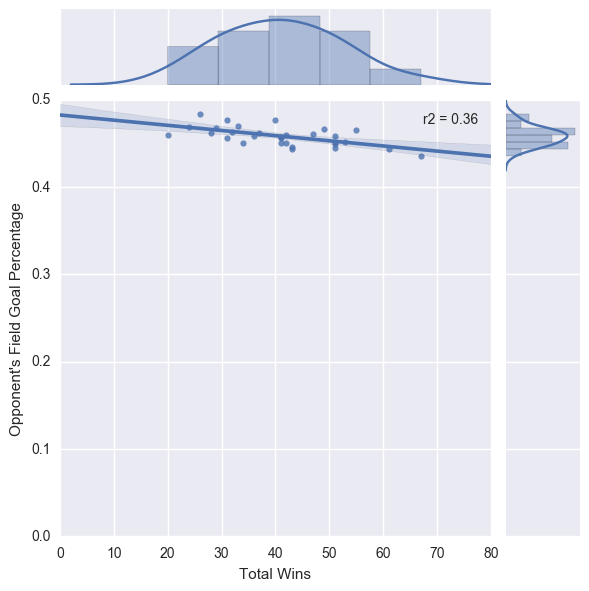

In [42]:
# scipy.stats pearsonr to find r squared
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

# create scatter plot 
joint_ax = sns.jointplot('win_or_loss', 
              'opp_fgpct', 
              kind='reg', 
              data=fg_pct_df, 
              stat_func=r2)

ax = joint_ax.ax_joint

ax.set(xlabel='Total Wins',
       ylabel="Opponent's Field Goal Percentage")

plt.ylim(0,0.5)
plt.xlim(0,80)

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

Defense is clearly still a factor in winning games. The difference between the worst teams and best teams when it comes to average opponent's field goal percentage is quite small though, as seen by the regression line's slope being relatively low. The r-squared value of 36% means the regression line explains part of the spread in the data, there is some variation in field goal percentage's relation to wins as seen in the scatter plot.

## Average Team Assists

One of the major offensive stats I am interested in is team assists. Passing the ball quickly around the court changes the flow of the game - it puts pressure on the defense to communicate, and rotate effectively. Maintaining this focus for a full game is probably not an easy task. 

I wouldn't say every team has a pass-first mentality on offense, but I would like to see how assists correlate with wins and I am using a team average because to really force the defense into difficult situations the entire team needs to be willing to pass. 

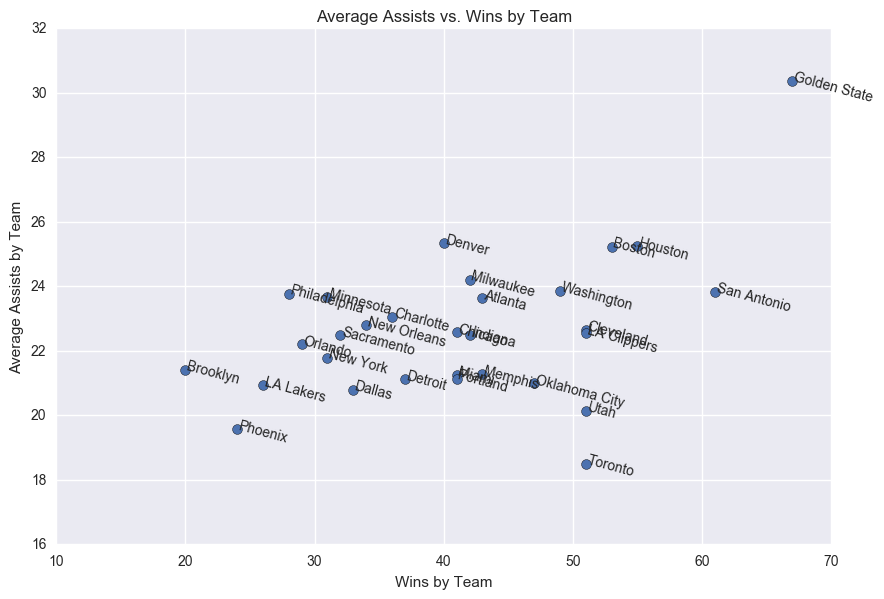

In [68]:
# create new dataframe with average assists, and team win counts
team_assists = tbsdf[['TEAMS', 'A', 'win_or_loss']]
team_assists = team_assists.groupby('TEAMS').agg({'A':'mean', 'win_or_loss':'sum'})[['A', 'win_or_loss']]

# create scatter plot 
ax = team_assists.plot('win_or_loss', 
                       'A', 
                       kind='scatter',
                       figsize=(10,6.66),
                       s=50)
ax.set_ylabel('Average Assists by Team')
ax.set_xlabel('Wins by Team')
ax.set_title('Average Assists vs. Wins by Team')

# add annotations to see which teams are the outliers
n=team_assists.index

for i, txt in enumerate(n):
    ax.annotate(txt, (team_assists.win_or_loss[i],team_assists.A[i]),rotation=-15)
plt.show()

This scatter plot was interesting. Toronto and Utah are two of the better teams in the league, but have relatively low assist averages given their win totals. Golden State was the other obivous outlier. During the 2016-2017 season the Warriors were one of the best teams in league history. Their assist average was by far the highest in the league. 

### Hypothesis Test and Statistical Analysis
### Average Assists and Team Wins

As mentioned earlier, assists are theoretically an important aspect of winning games in the current NBA climate. At least this is my belief. I want to test this hypothesis statistically and see if the idea has any merit. 

To do this, I will break the NBA teams into two groups: those that made the playoffs and those that did not and test average assists for both groups against each other using a two-sample z-test. The z-test is appropriate here because the population standard deviations are known (all teams within the NBA make up the whole population of interest).

**Null Hypothesis:** average assists per game for playoff teams **=** average assists per game for non-playoff teams

**Alternative Hypothesis:** average assists per game for playoff teams **>** average assists per game for non-playoff teams

**Alpha Level:** .05

In [ ]:
team_assists = team_assists.reset_index()

In [80]:
playoff_teams = team_assists.loc[(team_assists['TEAMS'] == 'Boston') |
                                 (team_assists['TEAMS'] == 'Chicago') |
                                 (team_assists['TEAMS'] == 'Golden State') |
                                 (team_assists['TEAMS'] == 'Portland') |
                                 (team_assists['TEAMS'] == 'San Antonio') |
                                 (team_assists['TEAMS'] == 'Memphis') |
                                 (team_assists['TEAMS'] == 'Cleveland') |
                                 (team_assists['TEAMS'] == 'Indiana') |
                                 (team_assists['TEAMS'] == 'Toronto') |
                                 (team_assists['TEAMS'] == 'Milwaukee') |
                                 (team_assists['TEAMS'] == 'Houston') |
                                 (team_assists['TEAMS'] == 'Oklahoma City') |
                                 (team_assists['TEAMS'] == 'LA Clippers') |
                                 (team_assists['TEAMS'] == 'Utah') |
                                 (team_assists['TEAMS'] == 'Washington') |
                                 (team_assists['TEAMS'] == 'Atlanta')]
playoff_teams

,TEAMS,A,win_or_loss
0,Atlanta,23.634146,43
1,Boston,25.231707,53
4,Chicago,22.573171,41
5,Cleveland,22.658537,51
9,Golden State,30.378049,67
10,Houston,25.243902,55
11,Indiana,22.487805,42
12,LA Clippers,22.536585,51
14,Memphis,21.268293,43
16,Milwaukee,24.195122,42


In [81]:
non_playoff_teams = team_assists.loc[(team_assists['TEAMS'] != 'Boston') &
                                 (team_assists['TEAMS'] != 'Chicago') &
                                 (team_assists['TEAMS'] != 'Golden State') &
                                 (team_assists['TEAMS'] != 'Portland') &
                                 (team_assists['TEAMS'] != 'San Antonio') &
                                 (team_assists['TEAMS'] != 'Memphis') &
                                 (team_assists['TEAMS'] != 'Cleveland') &
                                 (team_assists['TEAMS'] != 'Indiana') &
                                 (team_assists['TEAMS'] != 'Toronto') &
                                 (team_assists['TEAMS'] != 'Milwaukee') &
                                 (team_assists['TEAMS'] != 'Houston') &
                                 (team_assists['TEAMS'] != 'Oklahoma City') &
                                 (team_assists['TEAMS'] != 'LA Clippers') &
                                 (team_assists['TEAMS'] != 'Utah') &
                                 (team_assists['TEAMS'] != 'Washington') &
                                 (team_assists['TEAMS'] != 'Atlanta')]
non_playoff_teams

,TEAMS,A,win_or_loss
2,Brooklyn,21.414634,20
3,Charlotte,23.060976,36
6,Dallas,20.792683,33
7,Denver,25.329268,40
8,Detroit,21.121951,37
13,LA Lakers,20.926829,26
15,Miami,21.243902,41
17,Minnesota,23.658537,31
18,New Orleans,22.792683,34
19,New York,21.780488,31


In [82]:
print('Mean Assist Rate for playoff teams: %.3f' % playoff_teams['A'].mean())
print('Std Error for assist rate of playoff teams: %.3f' % playoff_teams['A'].std())

Mean Assist Rate for playoff teams: 23.040
Std Error for assist rate of playoff teams: 2.676


In [83]:
print('Mean Assist Rate for non-playoff teams: %.3f' % non_playoff_teams['A'].mean())
print('Std Error for assist rate of non-playoff teams: %.3f' % non_playoff_teams['A'].std())

Mean Assist Rate for non-playoff teams: 22.152
Std Error for assist rate of non-playoff teams: 1.492


In [89]:
# calculate z-score

mean_playoff = playoff_teams['A'].mean()
std_playoff = playoff_teams['A'].std()

mean_non_playoff = non_playoff_teams['A'].mean()
std_non_playoff = non_playoff_teams['A'].std()

len_playoff = len(playoff_teams)
len_non_playoff = len(non_playoff_teams)

# 0 comes from the null hypothesis, we are expecting no difference
z_numerator = (mean_playoff - mean_non_playoff - 0)

z_denominator = np.sqrt((std_playoff / len_playoff) + (std_non_playoff / len_non_playoff))

z_score = z_numerator / z_denominator
print('z-score: %.3f' % z_score)

z-score: 1.697


From the z-table a critical value of z = 1.645 corresponds to an alpha level of .05 for a 1-tailed test. Since our calculated z-score was 1.697, in this case, we can reject the null hypothesis and say that assist rates **do** have a statistically significant (alpha level at .05) difference between a team making the playoffs and a team missing the playoffs. 

## Game Pace

The pace of the game is a measure of how many possessions were possible during a game. Shooting early in the shotclock, before 12 seconds are left out of 24 is a rough estimate, and aggressively pursuing fast break opportunities are two ways to increase the pace of the game. 

A faster pace has ramifications in many aspects of the game. Putting pressure on the defense is key to causing mistakes that lead to points. A faster pace can contribute to this. Other benefits of a faster pace are higher percentage shots, more transition chances, and the ability to go on scoring runs that can put the game out of reach for the opponent. 

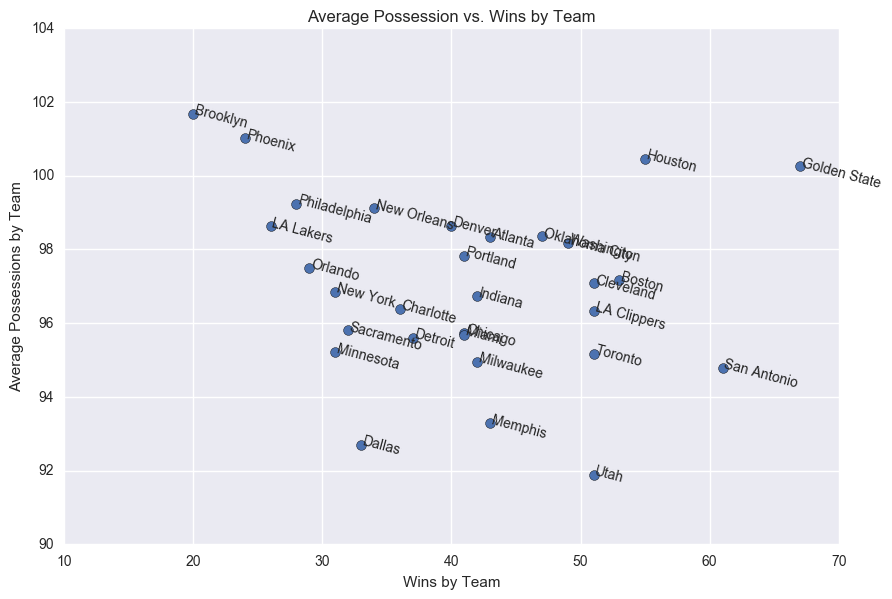

In [44]:
# create new dataframe to hold possession details, and wins
team_poss = tbsdf[['TEAMS', 'POSS', 'win_or_loss']]
team_poss = team_poss.groupby('TEAMS').agg({'POSS':'mean', 'win_or_loss':'sum'})[['POSS', 'win_or_loss']]

# create scatter plot 
ax = team_poss.plot('win_or_loss', 
                       'POSS', 
                       kind='scatter',
                       figsize=(10,6.66),
                       s=50)
ax.set_ylabel('Average Possessions by Team')
ax.set_xlabel('Wins by Team')
ax.set_title('Average Possession vs. Wins by Team')

# add annotations to see which teams are the outliers
n=team_poss.index

for i, txt in enumerate(n):
    ax.annotate(txt, (team_poss.win_or_loss[i],team_poss.POSS[i]),rotation=-15)
plt.show()

Not quite what I was expecting. Again, Golden State (and Houston, which is a very good team as well) have achieved success by playing at a high pace and racking up a lot of wins. From watching San Antonio I would have guessed they played at a higher pace then what the data shows. 

This plot really shows the different strategies each team uses. Brooklyn and Phoenix do not have talented rosters. I would hazard a guess that their coaches decided their best chance to win would be running the other team off the court. 

Teams like Memphis (that's Zach Randolph below playing defense) and Utah have some skilled players and more of a defensive mindset than most other teams, so playing at a slower pace might be beneficial to them.

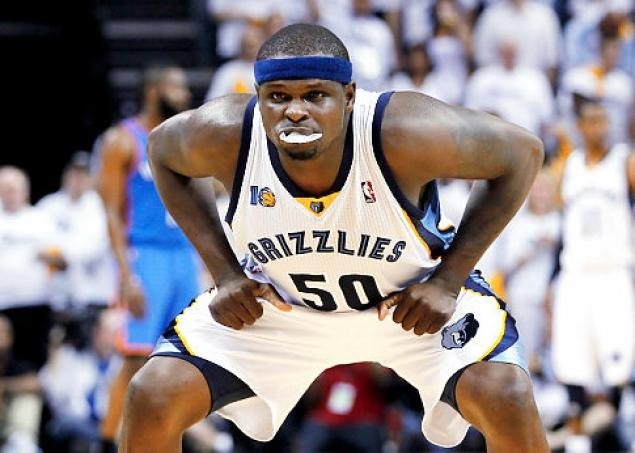

In [50]:
Image("zach.jpg")

I took a second look at the pace scatter plot and want to see it with a regression line. It looks like (with a few outliers) as Possessions goes down, wins go up, which was not what I was expecting at all.

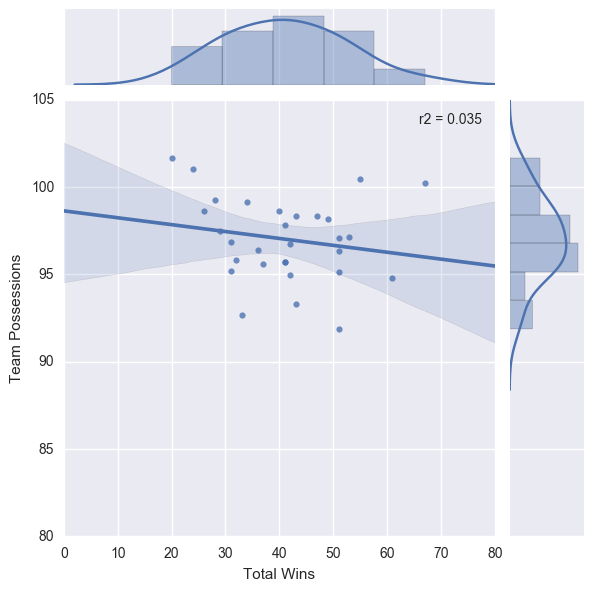

In [52]:
# create scatter plot 
joint_ax = sns.jointplot('win_or_loss', 
              'POSS', 
              kind='reg', 
              data=team_poss, 
              stat_func=r2)

ax = joint_ax.ax_joint

ax.set(xlabel='Total Wins',
       ylabel="Team Possessions")

plt.ylim(80,105)
plt.xlim(0,80)

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

Much like the Opponent Field Goal Percentage plot above, the slope is quite small, but the trend is clear - generally speaking this season in the NBA, playing at a slower pace correlates with more wins. 

The outlier in this particular case is important however: Golden State was able to basically run their opponent off the court nearly every game for the entire season.

The calculated r-squared value for this plot is low (3.5%), indicating that there is a lot of spread in the data. A team could play slow and win, or a team could play fast and win, and the opposites of those are also true. Possessions is an indicator of how a team plays, not necessarily if they will win or lose.

## Player Efficiency

I'm going to create a new variable - Player Efficiency (PE). What does this measure and why is it potentially important?

The formula to derive it is simple: Made Field Goals + Assists / Total Field Goal Attempts. In other words: when a player is utilized on the offensive end, do they generate positive plays? I would entertain the argument that generating field goal attempts is in and of itself useful, but I'm more concerned with generating field goal attempts that lead to points, which is what PE measures. 

The team statistics explored previously in this report measure how well teams as a whole perform. It is also important to identify individual players that are capable of playing within a system designed to win in the current NBA. Trading, drafting, or signing free agents that are highly efficient could prove beneficial to building a winning team. 

The code to generate this new variable will be a little more involved than what came before, and will utilize a different dataset - play by play records for every game played during the season.

In [21]:
pbpdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/play_by_play_cleaned.csv')
pbpdf.head()

,game_id,date,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,period,away_score,home_score,play_id,team_in_possession,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,remaining_time_sec,elapsed_sec,play_length_sec
0,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,0,0,0,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,720,0,0
1,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,0,0,1,NYK,jump ball,NaN,Joakim Noah,Tristan Thompson,NaN,NaN,NaN,0,NaN,0,Tristan Thompson,0,Derrick Rose,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Thompson vs. Noah: Tip to Rose,720,0,0
2,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,2,0,2,NYK,shot,Joakim Noah,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Derrick Rose,2,NaN,NaN,made,NaN,Driving Layup,1.0,4.0,8.0,24.6,5.8,Rose 1' Driving Layup (2 PTS) (Noah 1 AST),700,20,20
3,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,2,0,3,CLE,miss,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Kevin Love,0,NaN,NaN,missed,NaN,Hook Shot,4.0,-11.0,36.0,23.9,85.4,MISS Love 4' Hook Shot,686,34,14
4,21600001,2016-10-25,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving,1,2,0,4,NYK,rebound,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Joakim Noah,0,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Noah REBOUND (Off:0 Def:1),683,37,3


In [16]:
# new dataframe to hold the columns of interest
poss_df = pbpdf[['player', 'assist', 'type', 'result']]

# remove NaN from 'result' column (these are not shots)
poss_df = poss_df[poss_df.result.notnull()]
poss_df.head()

,player,assist,type,result
2,Derrick Rose,Joakim Noah,Driving Layup,made
3,Kevin Love,NaN,Hook Shot,missed
5,Carmelo Anthony,NaN,Jump Shot,missed
7,Kristaps Porzingis,NaN,unknown,made
8,LeBron James,Kyrie Irving,Jump Shot,made


In [17]:
# there are items in the 'type' column that need to be removed
poss_df.type.unique()

array(['Driving Layup', 'Hook Shot', 'Jump Shot', 'unknown',
       'Free Throw 1 of 2', 'Free Throw 2 of 2', 'Floating Jump Shot',
       'Turnaround Jump Shot', 'Layup', 'Free Throw 1 of 1',
       'Running Layup', 'Free Throw Technical', 'Alley Oop Dunk',
       'Putback Dunk', 'Step Back Jump Shot', 'Running Dunk',
       'Running Reverse Layup', 'Dunk', 'Pullup Jump Shot', 'Driving Dunk',
       'Fadeaway Jumper', 'Jump Bank Shot', 'Driving Bank Shot',
       'Finger Roll Layup', 'Turnaround Hook Shot', 'Reverse Layup',
       'Putback Layup', 'Driving Finger Roll Layup',
       'Driving Reverse Layup', 'Reverse Dunk', 'Driving Hook Shot',
       'Turnaround Fadeaway ', 'Running Jump Shot',
       'Running Finger Roll Layup', 'Free Throw 1 of 3',
       'Free Throw 2 of 3', 'Free Throw 3 of 3', 'Alley Oop Layup',
       'Driving Bank Hook Shot', 'Free Throw Flagrant 1 of 2',
       'Free Throw Flagrant 2 of 2', 'Turnaround Bank Shot',
       'Fadeaway Bank Shot', 'Turnaround Bank 

In [18]:
# create list of 'type' items I do not want
mask = poss_df['type'].isin(['Free Throw Flagrant 1 of 1',
                            'Free Throw Clear Path 2 of 2',
                            'Free Throw Clear Path 1 of 2',
                            'Free Throw Flagrant 2 of 2',
                            'Free Throw Flagrant 1 of 2',
                            'Free Throw 3 of 3',
                            'Free Throw 2 of 3',
                            'Free Throw 1 of 3',
                            'Free Throw 1 of 1',
                            'Free Throw 2 of 2',
                            'Free Throw 1 of 2',
                            'Free Throw Technical'])

# select everything except those items
poss_df = poss_df[~mask]

# check that the remaining 'type' items are valid shot attempts
poss_df.type.unique()

array(['Driving Layup', 'Hook Shot', 'Jump Shot', 'unknown',
       'Floating Jump Shot', 'Turnaround Jump Shot', 'Layup',
       'Running Layup', 'Alley Oop Dunk', 'Putback Dunk',
       'Step Back Jump Shot', 'Running Dunk', 'Running Reverse Layup',
       'Dunk', 'Pullup Jump Shot', 'Driving Dunk', 'Fadeaway Jumper',
       'Jump Bank Shot', 'Driving Bank Shot', 'Finger Roll Layup',
       'Turnaround Hook Shot', 'Reverse Layup', 'Putback Layup',
       'Driving Finger Roll Layup', 'Driving Reverse Layup',
       'Reverse Dunk', 'Driving Hook Shot', 'Turnaround Fadeaway ',
       'Running Jump Shot', 'Running Finger Roll Layup', 'Alley Oop Layup',
       'Driving Bank Hook Shot', 'Turnaround Bank Shot',
       'Fadeaway Bank Shot', 'Turnaround Bank Hook Shot',
       'Pullup Bank Shot', 'Hook Bank Shot', 'Driving Jump Shot',
       'Running Hook Shot'], dtype=object)

In [19]:
# create dataframe to hold assist data
assist_df = poss_df[['assist', 'result']]

# remove shots where there was no assist
assist_df = assist_df[assist_df.assist.notnull()]

#reset index to start from 0 again
assist_df = assist_df.reset_index(drop=True)
assist_df.head()

,assist,result
0,Joakim Noah,made
1,Kyrie Irving,made
2,LeBron James,made
3,LeBron James,made
4,Derrick Rose,made


In [8]:
# create pivot to see counts per player
assistpivot_df = assist_df.pivot_table(index='assist', columns='result', aggfunc=len)

# drop the blank rows
assistpivot_df = assistpivot_df.drop(assistpivot_df.index[0])

# rename index to make matching with made shots data frame possible
assistpivot_df.index.rename('player', inplace=True)
assistpivot_df.head()

# 'made' column is count of assists

result,made
player,
AJ Hammons,4
Aaron Brooks,126
Aaron Gordon,150
Aaron Harrison,3
Adreian Payne,7


In [9]:
# create shots attempted df
shot_attempt_df = poss_df[['player', 'type', 'result']]
shot_attempt_df.reset_index(drop=True)
shot_attempt_df.head()

,player,type,result
2,Derrick Rose,Driving Layup,made
3,Kevin Love,Hook Shot,missed
5,Carmelo Anthony,Jump Shot,missed
7,Kristaps Porzingis,unknown,made
8,LeBron James,Jump Shot,made


In [10]:
# pivot to get counts
shot_attempt_df = shot_attempt_df.pivot_table(index='player',
                                             columns='result',
                                             aggfunc=len)

# restructure to be in a usuable format
shot_attempt_df.columns = [''.join(col).strip() for col in shot_attempt_df.columns.values]
shot_attempt_df.head()

,typemade,typemissed
player,,
AJ Hammons,17.0,25.0
Aaron Brooks,123.0,180.0
Aaron Gordon,393.0,472.0
Aaron Harrison,NaN,4.0
Adreian Payne,23.0,31.0


In [11]:
# concatenate the assist and shot dataframes to have one row per player
concat_shot_df = pd.concat([shot_attempt_df, assistpivot_df], axis=1)
concat_shot_df.head()

,typemade,typemissed,made
AJ Hammons,17.0,25.0,4.0
Aaron Brooks,123.0,180.0,126.0
Aaron Gordon,393.0,472.0,150.0
Aaron Harrison,NaN,4.0,3.0
Adreian Payne,23.0,31.0,7.0


In [12]:
# need to replace NaN with 0 to make math formulas work
concat_shot_df['typemade'].fillna(0,inplace=True)
concat_shot_df['typemissed'].fillna(0,inplace=True)

In [13]:
# create total assists+shots column
concat_shot_df['total_assist_shot'] = concat_shot_df['typemade'] + concat_shot_df['made']
concat_shot_df.head()

,typemade,typemissed,made,total_assist_shot
AJ Hammons,17.0,25.0,4.0,21.0
Aaron Brooks,123.0,180.0,126.0,249.0
Aaron Gordon,393.0,472.0,150.0,543.0
Aaron Harrison,0.0,4.0,3.0,3.0
Adreian Payne,23.0,31.0,7.0,30.0


In [14]:
# create total shots column
concat_shot_df['total_shots'] = concat_shot_df['typemade'] + concat_shot_df['typemissed']
concat_shot_df.head()

,typemade,typemissed,made,total_assist_shot,total_shots
AJ Hammons,17.0,25.0,4.0,21.0,42.0
Aaron Brooks,123.0,180.0,126.0,249.0,303.0
Aaron Gordon,393.0,472.0,150.0,543.0,865.0
Aaron Harrison,0.0,4.0,3.0,3.0,4.0
Adreian Payne,23.0,31.0,7.0,30.0,54.0


In [15]:
# create Player Efficiency column
concat_shot_df['PE'] = concat_shot_df['total_assist_shot'] / concat_shot_df['total_shots']

In [16]:
# limit shot attempts to > 500
# less than that means the player was not involved much in each game
concat_shot_df.drop(concat_shot_df[(concat_shot_df.total_shots < 500)].index,inplace=True)
concat_shot_df.head()

,typemade,typemissed,made,total_assist_shot,total_shots,PE
Aaron Gordon,393.0,472.0,150.0,543.0,865.0,0.627746
Al Horford,490.0,501.0,434.0,924.0,991.0,0.932392
Al-Farouq Aminu,200.0,304.0,103.0,303.0,504.0,0.601190
Allen Crabbe,312.0,359.0,96.0,408.0,671.0,0.608048
Andre Drummond,483.0,428.0,90.0,573.0,911.0,0.628979


In [17]:
# create new dataframe to hold top 20 players by PE
pe_df = concat_shot_df['PE']

# sort values and take top 20 players
pe_df = pe_df.sort_values(ascending=False)
pe_df = pe_df[0:20]
pe_df = pe_df.sort_values()

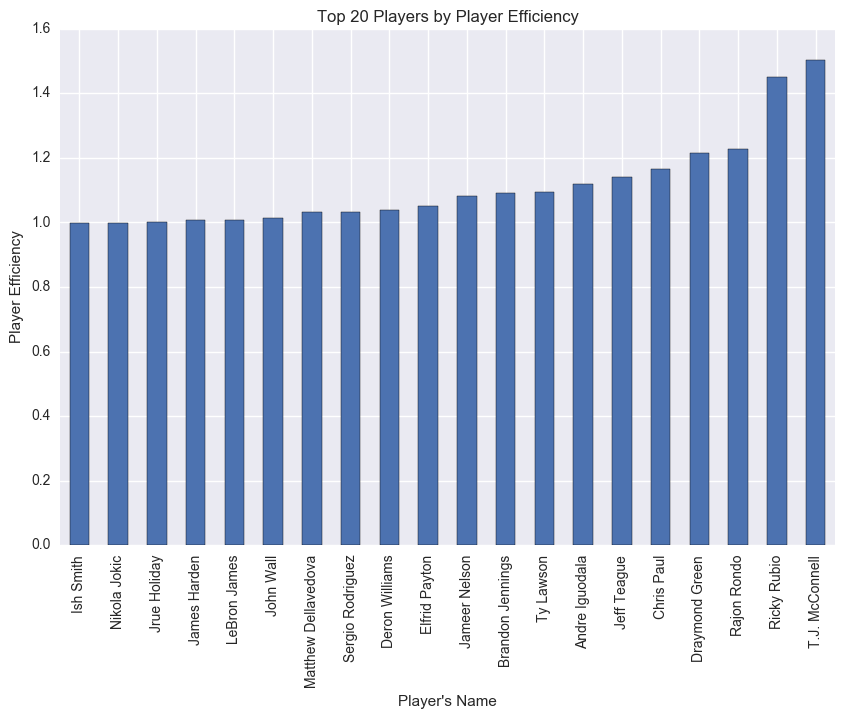

In [211]:
# create bar chart
ax = pe_df.plot(kind='bar',
               title='Top 20 Players by Player Efficiency',
               figsize=(10,6.66))

ax.set_ylabel('Player Efficiency')
ax.set_xlabel("Player's Name")

Definitely some interesting information here. The first thing that jumped out at me is that I had never heard of the top player the stat identifies - T.J. McConnell (pictured below). Some quick research shows that he is a highly efficient player flying somewhat under the radar. In other words, an ideal pickup for a team looking for good value and a player who makes the most of his chances. Other players on the list who also appear to be good values would be Ish Smith, Nikola Jokic, Elfrid Payton, and to a slightly lesser extent, Jrue Holliday.

The prevalance of point guards is noteworthy if not surprising. Point guards generally can score the ball but their primary concern (at least traditionally) is to generate assists. Players like Ricky Rubio, Rajon Rondo, Ty Lawson, and Jameer Nelson are pass-first players that are capable of scoring but don't let that get in the way of finding open teammates.

Lebron James and James Harden making the list is also interesting. These are two of the best players in the league, and often are primary ballhandlers for their team. They both score very often, but have grown adept at passing when the defense focuses on them, as it often does.

One other aspect of the chart that stuck out is the presence of Draymond Green (#4 on the list) and Andre Iguodala (number 7). These two players are members of the Golden State Warriors, a team previously identified as among the fastest paced and as a team that generates a lot of assists. Having at least two players who are highly efficient would probably be a requirement to generate stats like the ones detailed above in this report.

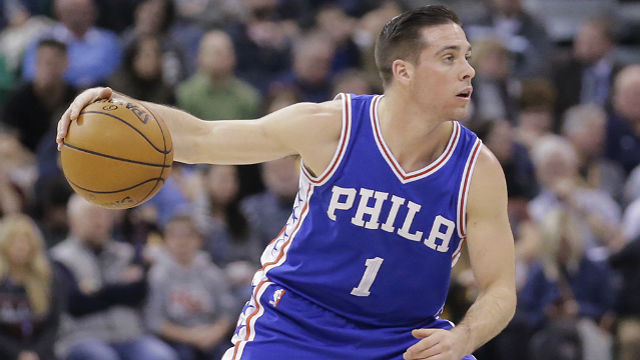

In [2]:
Image("tj.jpg")

## Player Efficiency - 3PT and Free Throw Adjusted

The metric calculated in the previous section did not make any adjustments for 3 pointers or free throws. 3 pointers count for 1.5 times the points of a regular basket, and free throws are a positive outcome to a possession. Many players in the NBA excel at drawing fouls and shooting 3 pointers. 

In the following section I will generate a similar metric as before, but now count a made free throw as 0.5 field goals, and a made 3 pointer as 1.5 field goals. 

I will also consider turnovers as well by subtracting the turnover total from assists.

This should give a better measure of how players are contributing to the team when on offense.

In [4]:
# new dataframe to hold the columns of interest
pbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/player_box_score_cleaned.csv')
adj_pe_df = pbsdf[['PLAYER FULL NAME', 'FG', 'FGA', 'FT', 'TOT', 'FTA', '3P', '3PA', 'A']].copy()
adj_pe_df.head()

,PLAYER FULL NAME,FG,FGA,FT,TOT,FTA,3P,3PA,A
0,Carmelo Anthony,8,18,2,5,2,1,4,3
1,Kristaps Porzingis,5,13,3,7,6,3,5,0
2,Joakim Noah,0,1,0,6,0,0,0,3
3,Courtney Lee,0,5,0,3,0,0,2,0
4,Derrick Rose,7,17,2,3,2,1,2,1


In [5]:
# add new column for Total Field Goals Adjusted
# 3 pointers are counted separately so they are subtracted from 'FG' value
adj_pe_df.loc[:,'FG_adj'] = (adj_pe_df.FG - adj_pe_df['3P']) + (adj_pe_df.A - adj_pe_df.TOT) + (adj_pe_df['3P'] * 1.5) + (adj_pe_df['FT'] * 0.5)
adj_pe_df.head()

,PLAYER FULL NAME,FG,FGA,FT,TOT,FTA,3P,3PA,A,FG_adj
0,Carmelo Anthony,8,18,2,5,2,1,4,3,7.5
1,Kristaps Porzingis,5,13,3,7,6,3,5,0,1.0
2,Joakim Noah,0,1,0,6,0,0,0,3,-3.0
3,Courtney Lee,0,5,0,3,0,0,2,0,-3.0
4,Derrick Rose,7,17,2,3,2,1,2,1,6.5


In [6]:
# need to account for the cases where a player did not attempt any field goals
adj_pe_df.loc[adj_pe_df['FGA']==0,'FGA'] = 1


In [7]:
# calculate PE adjusted statistic
adj_pe_df.loc[:, 'PE_adj'] = adj_pe_df.FG_adj / adj_pe_df.FGA
adj_pe_df.head()

,PLAYER FULL NAME,FG,FGA,FT,TOT,FTA,3P,3PA,A,FG_adj,PE_adj
0,Carmelo Anthony,8,18,2,5,2,1,4,3,7.5,0.416667
1,Kristaps Porzingis,5,13,3,7,6,3,5,0,1.0,0.076923
2,Joakim Noah,0,1,0,6,0,0,0,3,-3.0,-3.000000
3,Courtney Lee,0,5,0,3,0,0,2,0,-3.0,-0.600000
4,Derrick Rose,7,17,2,3,2,1,2,1,6.5,0.382353


In [8]:
# create new dataframe for the plot
pe_adj = adj_pe_df[['PLAYER FULL NAME', 'FGA', 'PE_adj']].copy()

# summarize the entire season box scores into aggregates for each player
pe_adj = adj_pe_df.groupby('PLAYER FULL NAME').agg({'FGA':'sum', 'PE_adj':'mean'})

# only interested in players that had a moderate amount of FGA or more
pe_adj.drop(pe_adj[(pe_adj.FGA < 500)].index,inplace=True)

# sort by PE_adj with the highest values on top
pe_adj = pe_adj.sort_values('PE_adj',ascending=False)

# take only the top 20 players for the plot
pe_adj_plot = pe_adj[0:20]

# sort them again to make reading the plot easier
pe_adj_plot = pe_adj_plot.sort_values('PE_adj')

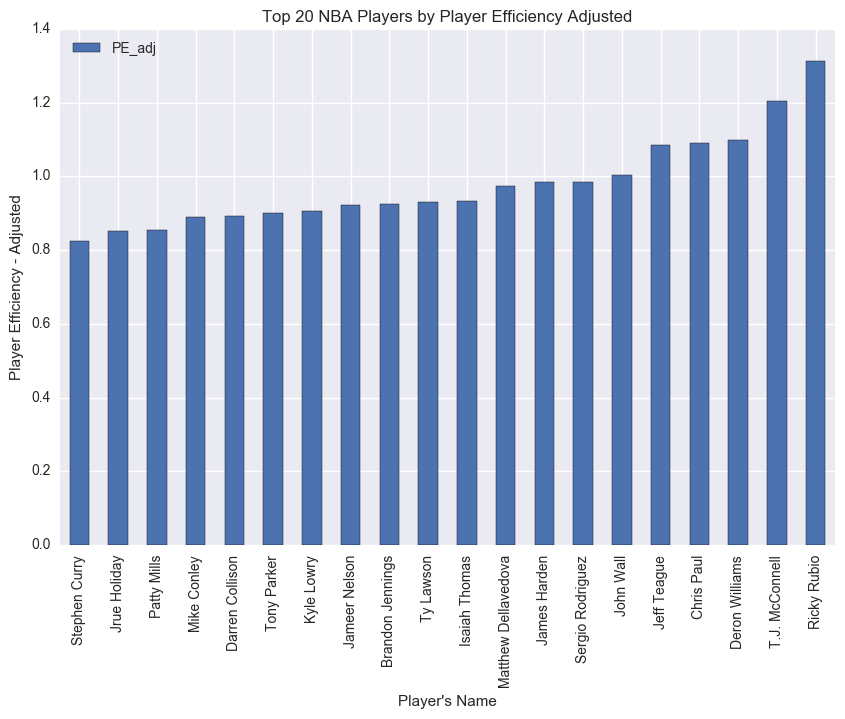

In [9]:
# create bar chart
ax = pe_adj_plot.plot(y='PE_adj',
                      kind='bar',
                      title='Top 20 NBA Players by Player Efficiency Adjusted',
                      figsize=(10,6.66))

ax.set_ylabel('Player Efficiency - Adjusted')
ax.set_xlabel("Player's Name")

I was interested in making a stat measuring player efficiency, and for better or worse, that's what I did. The players on this list are able to generate a lot of points while minimizing turnovers and missed shots. 

Ricky Rubio (pictured below) is an interesting case because he shoots a low percentage overall, but he just doesn't shoot that often. His combination of being an excellent passer, and not prone to turnovers means he is highly efficient overall. 

Some of the other stand-outs from this chart are Chris Paul, someone who shoots quite a bit, and has more turnovers on average, but his higher scoring is able to offset that to a degree. 

Patty Mills is a little different from the other players on the list because he is not a primary ball-handler. More than half of his field goal attempts are 3 pointers. 

James Harden appears again. The Houston Rockets essentially run their entire offense through him, and again his combination of shooting often, and high assists offset his turnovers. 

One last player I want to mention is Steph Curry. Generally regarded as one of the best players in the league, his penchant for 3 pointers is not able to offset his generally lower field-goal percentage (expected because he shoots those 3's), and his turnover totals.

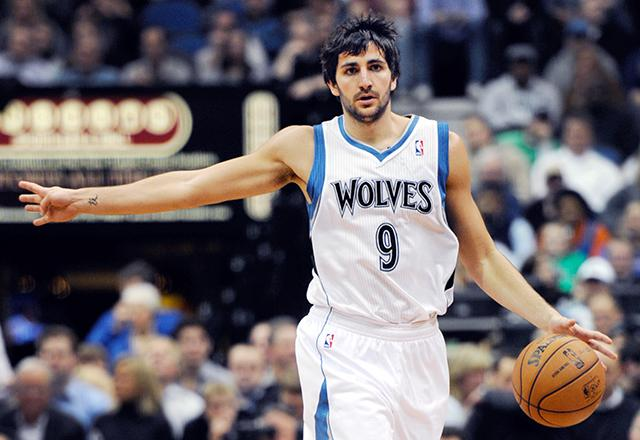

In [10]:
Image("RickyRubio.jpg")

### Hypothesis Test and Statistical Analysis
### Team Efficiency Rating

The exploration in the previous two sections dealt with the efficiency stat as it relates to players. In the following section I will compute a season-wide team efficiency stat, and then divide the teams up by those that made the playoffs and those that did not. Lastly, I will run a hypothesis test to see if the mean difference between the two groups is statistically significant.

In [14]:
tbsdf.head()

,DATE,TEAMS,VENUE,1Q,2Q,3Q,4Q,OT1,OT2,OT3,OT4,F,MIN,FG,FGA,3P,3PA,FT,FTA,OR,DR,TOT,A,PF,ST,TO,TO TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,STARTING LINEUPS1,STARTING LINEUPS2,STARTING LINEUPS3,STARTING LINEUPS4,STARTING LINEUPS5
0,2016-10-25,New York,Road,18,27,19,24,NaN,NaN,NaN,NaN,88,240,32,87,9,27,15,20,13,29,42,17,22,6,18,18,6,88,100.4,100.4,87.7,116.6,3+,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose
1,2016-10-25,Cleveland,Home,28,20,34,35,NaN,NaN,NaN,NaN,117,240,45,94,13,35,14,19,11,40,51,31,22,12,14,15,5,117,100.4,100.4,116.6,87.7,3+,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving
2,2016-10-25,Utah,Road,26,20,37,21,NaN,NaN,NaN,NaN,104,240,40,82,8,24,16,16,6,25,31,19,19,9,11,14,5,104,92.5,92.5,112.4,122.1,3+,Joe Johnson,Boris Diaw,Rudy Gobert,Rodney Hood,George Hill
3,2016-10-25,Portland,Home,26,28,23,36,NaN,NaN,NaN,NaN,113,240,39,75,13,19,22,22,5,29,34,22,18,5,12,13,3,113,92.5,92.5,122.1,112.4,3+,Maurice Harkless,Al-Farouq Aminu,Mason Plumlee,CJ McCollum,Damian Lillard
4,2016-10-25,San Antonio,Road,31,33,33,32,NaN,NaN,NaN,NaN,129,240,47,98,12,24,23,26,21,34,55,25,19,13,13,14,3,129,98.8,98.8,130.6,101.2,3+,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker


In [16]:
# create new df with relevant team columns
team_eff_df = tbsdf[['TEAMS', 'FG', 'FGA', 'FT', 'FTA', 'TOT', '3P', '3PA', 'A']].copy()
team_eff_df.head()

,TEAMS,FG,FGA,FT,FTA,TOT,3P,3PA,A
0,New York,32,87,15,20,42,9,27,17
1,Cleveland,45,94,14,19,51,13,35,31
2,Utah,40,82,16,16,31,8,24,19
3,Portland,39,75,22,22,34,13,19,22
4,San Antonio,47,98,23,26,55,12,24,25


In [41]:
# add new column for Total Field Goals Adjusted
# 3 pointers are counted separately so they are subtracted from 'FG' value
team_eff_df.loc[:,'FG_adj'] = (team_eff_df.FG - team_eff_df['3P']) + (team_eff_df.A - team_eff_df.TOT) + (team_eff_df['3P'] * 1.5) + (team_eff_df['FT'] * 0.5)

# calculate PE adjusted statistic
team_eff_df.loc[:, 'PE_adj'] = team_eff_df.FG_adj / team_eff_df.FGA

# summarize the entire season box scores into aggregates for each team
team_pe_adj = team_eff_df.groupby('TEAMS').agg({'PE_adj':'mean'})

team_pe_adj = team_pe_adj.sort_values(by='PE_adj')
team_pe_adj.head()

,PE_adj
TEAMS,
Detroit,0.293218
Oklahoma City,0.318504
Chicago,0.320656
Phoenix,0.324725
New York,0.328119


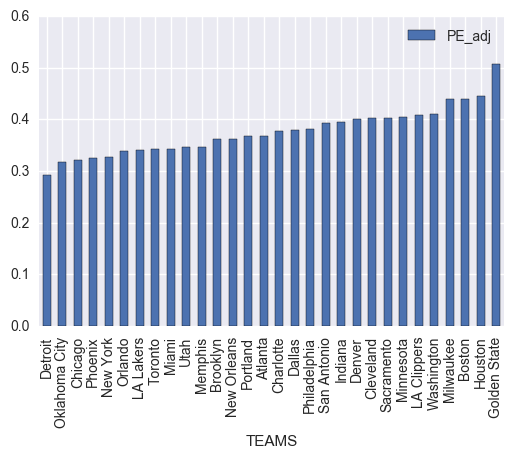

In [31]:
# quickly visualize the data with a bar chart
team_pe_adj.plot.bar()

In [35]:
team_pe_adj.reset_index(inplace=True)

### z-test 

I'm going to conduct a similar z-test as the one previously shown. This time I will be looking at team efficiency for the playoff teams versus the non playoff teams. The overall trend in the bar graph looks about right, with Golden State, Houston, and Boston at the top, but there are some curious outliers there as well - such as Sacramento and Minnesota being near the top.

**Null Hypothesis:** average Team Efficiency for playoff teams **=** average Team Efficiency for non-playoff teams

**Alternative Hypothesis:** average Team Efficiency for playoff teams **>** average Team Efficiency for non-playoff teams

**Alpha Level:** .05

In [37]:
playoff_pe_adj = team_pe_adj.loc[(team_pe_adj['TEAMS'] == 'Boston') |
                                 (team_pe_adj['TEAMS'] == 'Chicago') |
                                 (team_pe_adj['TEAMS'] == 'Golden State') |
                                 (team_pe_adj['TEAMS'] == 'Portland') |
                                 (team_pe_adj['TEAMS'] == 'San Antonio') |
                                 (team_pe_adj['TEAMS'] == 'Memphis') |
                                 (team_pe_adj['TEAMS'] == 'Cleveland') |
                                 (team_pe_adj['TEAMS'] == 'Indiana') |
                                 (team_pe_adj['TEAMS'] == 'Toronto') |
                                 (team_pe_adj['TEAMS'] == 'Milwaukee') |
                                 (team_pe_adj['TEAMS'] == 'Houston') |
                                 (team_pe_adj['TEAMS'] == 'Oklahoma City') |
                                 (team_pe_adj['TEAMS'] == 'LA Clippers') |
                                 (team_pe_adj['TEAMS'] == 'Utah') |
                                 (team_pe_adj['TEAMS'] == 'Washington') |
                                 (team_pe_adj['TEAMS'] == 'Atlanta')]
playoff_pe_adj

,TEAMS,PE_adj
1,Oklahoma City,0.318504
2,Chicago,0.320656
7,Toronto,0.342394
9,Utah,0.345834
10,Memphis,0.346896
13,Portland,0.367087
14,Atlanta,0.368654
18,San Antonio,0.392207
19,Indiana,0.394484
21,Cleveland,0.402038


In [38]:
non_playoff_pe = team_pe_adj.loc[(team_pe_adj['TEAMS'] != 'Boston') &
                                 (team_pe_adj['TEAMS'] != 'Chicago') &
                                 (team_pe_adj['TEAMS'] != 'Golden State') &
                                 (team_pe_adj['TEAMS'] != 'Portland') &
                                 (team_pe_adj['TEAMS'] != 'San Antonio') &
                                 (team_pe_adj['TEAMS'] != 'Memphis') &
                                 (team_pe_adj['TEAMS'] != 'Cleveland') &
                                 (team_pe_adj['TEAMS'] != 'Indiana') &
                                 (team_pe_adj['TEAMS'] != 'Toronto') &
                                 (team_pe_adj['TEAMS'] != 'Milwaukee') &
                                 (team_pe_adj['TEAMS'] != 'Houston') &
                                 (team_pe_adj['TEAMS'] != 'Oklahoma City') &
                                 (team_pe_adj['TEAMS'] != 'LA Clippers') &
                                 (team_pe_adj['TEAMS'] != 'Utah') &
                                 (team_pe_adj['TEAMS'] != 'Washington') &
                                 (team_pe_adj['TEAMS'] != 'Atlanta')]
non_playoff_pe

,TEAMS,PE_adj
0,Detroit,0.293218
3,Phoenix,0.324725
4,New York,0.328119
5,Orlando,0.339007
6,LA Lakers,0.340630
8,Miami,0.343111
11,Brooklyn,0.361821
12,New Orleans,0.361904
15,Charlotte,0.376979
16,Dallas,0.379813


In [39]:
# calculate z-score

mean_playoff_pe = playoff_pe_adj['PE_adj'].mean()
std_playoff_pe = playoff_pe_adj['PE_adj'].std()

mean_non_playoff_pe = non_playoff_pe['PE_adj'].mean()
std_non_playoff_pe = non_playoff_pe['PE_adj'].std()

len_playoff_pe = len(playoff_pe_adj)
len_non_playoff_pe = len(non_playoff_pe)

# 0 comes from the null hypothesis, we are expecting no difference
z_numerator = (mean_playoff_pe - mean_non_playoff_pe - 0)

z_denominator = np.sqrt((std_playoff_pe / len_playoff_pe) + (std_non_playoff_pe / len_non_playoff_pe))

z_score = z_numerator / z_denominator
print('z-score: %.3f' % z_score)

z-score: 0.411


The critical value of z = 1.645 corresponds to an alpha level of .05 for a 1-tailed test. The calculated z-score for this exercise was only 0.411, so here we cannot reject the null hypothesis and can say that any difference between the playoff and non-playoff teams in average team-efficiency is primarily due to chance. 

This test was not quite what I expected. Oklahoma City being one of the worst teams in the league was surprising. Sacramento being one of the best was as well. I think the limitations of the efficiency statistic that I calculated are much more clear after carrying out this z-test. It does not measure defense, which some teams are very good at. Individually strong players (such as OKC's Russell Westbrook) can be devalued if the rest of the team is below average (also very true of OKC). 

In my further investigations into this dataset I think I will leave the efficiency stat to measuring players, and not teams.

## Shot Chart Heat Maps

The last area I want to examine in this exploration is shot chart data - specfically where teams are making most of their shots from. Why is this important to consider? One example is that a 3 point shot from the top of the arc is further away from the basket then a corner 3. All things being equal, the corner 3 is the higher percentage shot.

Shooting just inside the 3 point arc is not considered a smart play - you might as well step back behind the line and try to hit a 3. Additionally, mid-range jumpers are something of a lost art in the NBA. The current trend is to shoot from very close to the basket or to shoot 3's, anything else is not considered optimal.

Below I will create heatmaps of two teams. First will be my personal favorite squad - the Sacramento Kings. They are a bad team, and I'm curious to see how their shot chart compares to the Golden State Warriors, who are a very good team.

In [31]:
pbpdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/play_by_play_cleaned.csv')

In [39]:
# create dataframe to hold relevant data
shot_df = pbpdf[['team_in_possession','original_x', 'original_y', 'result']]

# some rows do not contain shot data so they will be dropped
shot_df = shot_df.dropna()
shot_df.head()

,team_in_possession,original_x,original_y,result
2,NYK,4.0,8.0,made
3,CLE,-11.0,36.0,missed
5,NYK,148.0,129.0,missed
7,NYK,24.0,-1.0,made
8,CLE,-79.0,80.0,made


In [33]:
# filter dataframe down to made shots, and only for the Sacramento Kings
shot_df = shot_df[(shot_df.result == 'made') & (shot_df.team_in_possession == 'SAC')]

# clean dataframe to assist with graphing
shot_df = shot_df.drop('result', axis=1)
shot_df = shot_df.drop('team_in_possession', axis=1)

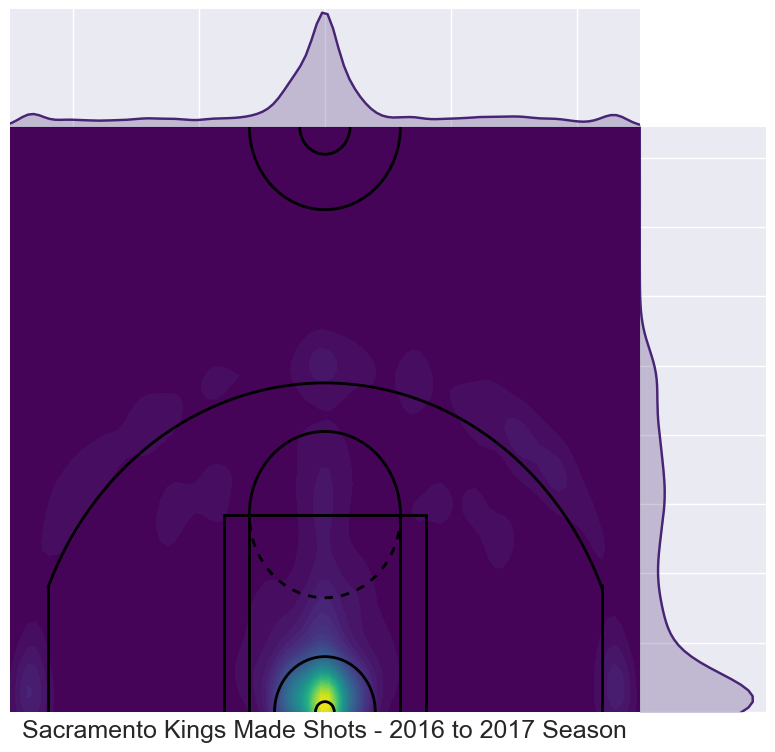

In [37]:
# set colormap for the heatmap
cmap = plt.cm.viridis

# create shot chart heatmap
joint_shot_chart = sns.jointplot(shot_df.original_x, 
                                 shot_df.original_y,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)

# set figure size
joint_shot_chart.fig.set_size_inches(8.72,8)

# set ax to draw court lines, and adjust presentation
ax = joint_shot_chart.ax_joint
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('Sacramento Kings Made Shots - 2016 to 2017 Season',fontsize=18)
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [40]:
# filter dataframe down to made shots, and only for the Sacramento Kings
shot_df = shot_df[(shot_df.result == 'made') & (shot_df.team_in_possession == 'GSW')]

# clean dataframe to assist with graphing
shot_df = shot_df.drop('result', axis=1)
shot_df = shot_df.drop('team_in_possession', axis=1)

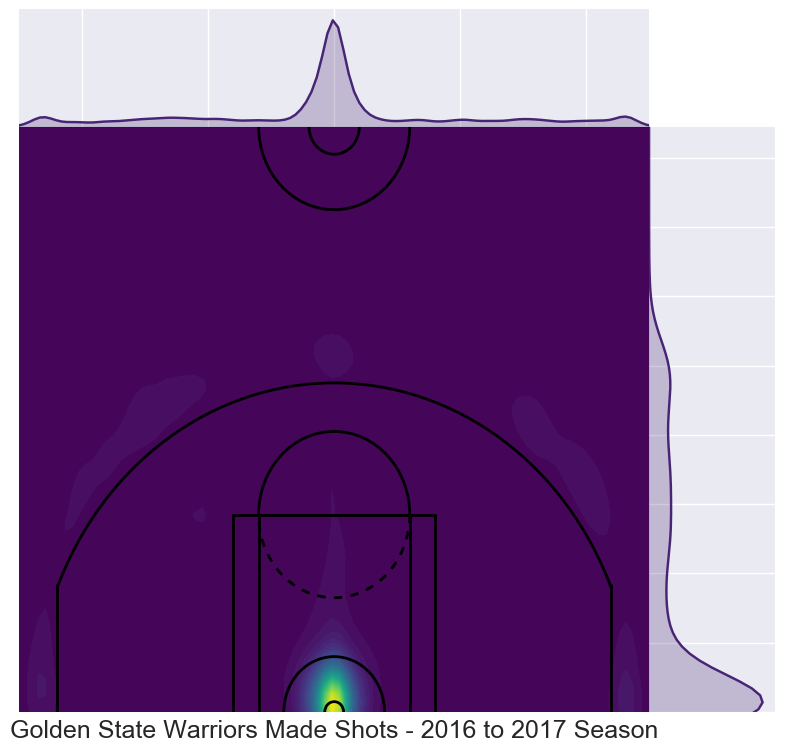

In [41]:
# set colormap for the heatmap
cmap = plt.cm.viridis

# create shot chart heatmap
joint_shot_chart = sns.jointplot(shot_df.original_x, 
                                 shot_df.original_y,
                                stat_func=None,
                                kind='kde',
                                space=0,
                                color=cmap(0.1),
                                cmap=cmap,
                                n_levels=50)

# set figure size
joint_shot_chart.fig.set_size_inches(8.72,8)

# set ax to draw court lines, and adjust presentation
ax = joint_shot_chart.ax_joint
draw_court(ax)
ax.set_xlim(250,-250)
ax.set_ylim(0, 422.5)
ax.set_xlabel('Golden State Warriors Made Shots - 2016 to 2017 Season',fontsize=18)
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

Some differences are very noticeable between the two teams. The Kings are much more sporadic in their shot choices, shooting quite a few more mid-range jumpers and spreading their shots throughout the key area (close to the basket). By contrast, the Warriors have what is likely considered an ideal shot chart for the current NBA. They shoot close to the basket or 3 pointers, excluding nearly all other shot opportunities. The triangle formed near the basket and spreading to the free throw line is also indicative of driving to the basket. Driving consistently opens up passing lanes and leads to high percentage shots either for the person driving or on a pass to a teammate.

# Conclusion

My goal for this exploration was to identify areas where teams could potentially make changes to generate more wins. More analysis and investigation is certainly warranted in areas such as shot selection, defensive and offensive mindsets, and even individual players that might make a positive impact, but clearly there are some aspects of the game that the better teams in the league execute more effectively than the less-successful teams. 

## Helper Function

In [35]:
# the function below was written by Savvas Tjortoglou
# http://savvastjortjoglou.com/nba-shot-sharts.html

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax
